## 加载数据

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. 数据加载
data = pd.read_csv('molecular_samples.csv')
data

,solubility,reactivity
0,5.745071,48.617357
1,5.971533,65.230299
2,4.648770,47.658630
3,7.368819,57.674347
4,4.295788,55.425600
...,...,...
115,23.174083,154.329172
116,25.113930,136.967993
117,30.359860,162.678380
118,19.937144,153.729086


## 可视化原始数据

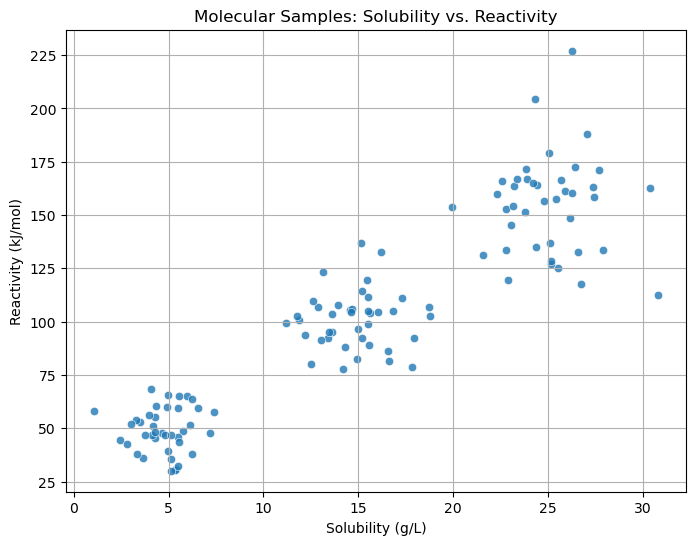

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('molecular_samples.csv')
data

# 绘制散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='solubility', y='reactivity', alpha=0.8)

# 设置标题和标签
plt.title('Molecular Samples: Solubility vs. Reactivity')
plt.xlabel('Solubility (g/L)')
plt.ylabel('Reactivity (kJ/mol)')
plt.grid(True)

# 显示图表
plt.show()

## 机器学习：聚合层次聚类

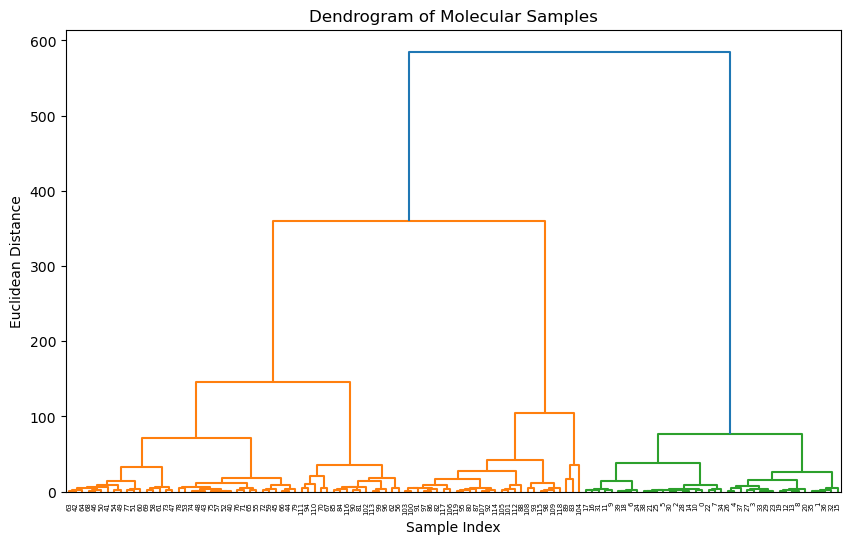

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 使用层次聚类中的Ward方法进行聚类
linked = linkage(data[['solubility', 'reactivity']], method='ward')

# 绘制树状图（Dendrogram）
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=None, distance_sort='descending', show_leaf_counts=True)

# 设置标题和标签
plt.title('Dendrogram of Molecular Samples')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

# 显示图表
plt.show()

   solubility  reactivity  cluster
0    5.745071   48.617357        1
1    5.971533   65.230299        1
2    4.648770   47.658630        1
3    7.368819   57.674347        1
4    4.295788   55.425600        1


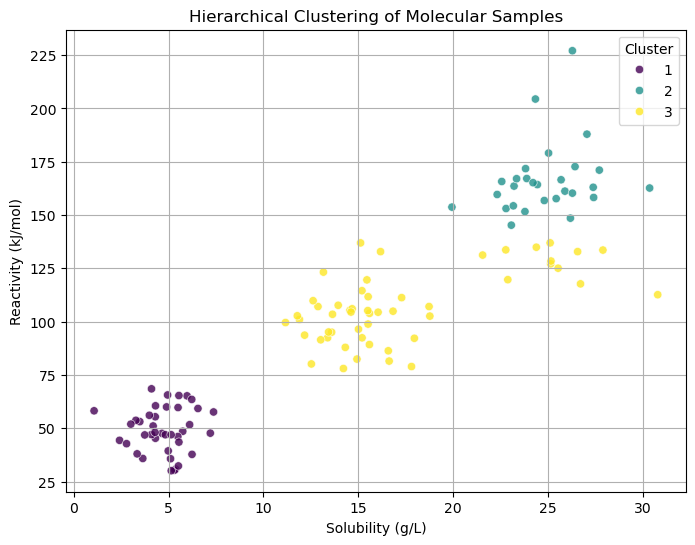

In [5]:
from scipy.cluster.hierarchy import fcluster

# 从层次聚类结果中提取簇（指定最大距离或簇数量）
clusters = fcluster(linked, t=3, criterion='maxclust')

# 将簇标签添加到数据集中
data['cluster'] = clusters

# 打印前几行数据，查看每个分子的簇标签
print(data.head())

# 可视化聚类结果
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='solubility', y='reactivity', hue='cluster', palette='viridis', alpha=0.8)

# 设置标题和标签
plt.title('Hierarchical Clustering of Molecular Samples')
plt.xlabel('Solubility (g/L)')
plt.ylabel('Reactivity (kJ/mol)')
plt.legend(title='Cluster', loc='best')
plt.grid(True)

# 显示图表
plt.show()

## 机器学习：分裂层次聚类，在 Python 中，没有直接的内置库支持分裂层次聚类，但我们可以使用 SciPy 和一些递归算法来手动实现分裂聚类。

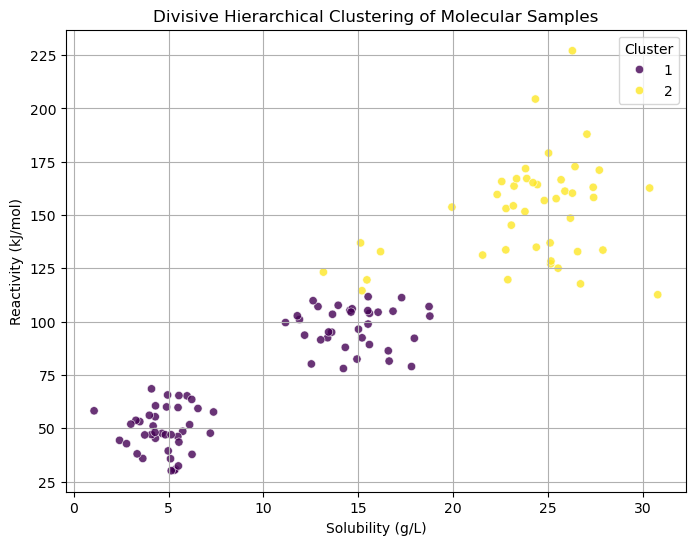

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

# 1. 加载数据
data = pd.read_csv('molecular_samples.csv')

# 2. 计算样本之间的距离矩阵
distance_matrix = squareform(pdist(data[['solubility', 'reactivity']], metric='euclidean'))

# 3. 分裂聚类算法定义
def divisive_clustering(data, max_clusters=3):
    """
    使用递归方式实现分裂层次聚类，将数据拆分为多个簇。
    
    参数：
    - data: 要聚类的数据（DataFrame）。
    - max_clusters: 希望拆分的最大簇数。
    
    返回：
    - clusters: 每个数据点所属的簇标签。
    """
    # 初始化簇标签，每个数据点开始都属于簇0
    cluster_labels = np.zeros(len(data), dtype=int)

    # 定义递归函数来进行分裂
    def recursive_split(data, labels, current_cluster=0):
        # 如果已经达到最大簇数，不再拆分
        if np.max(labels) + 1 >= max_clusters:
            return
        
        # 获取当前簇内的所有数据点
        current_data = data[labels == current_cluster]

        # 如果簇内数据不足以继续拆分，停止递归
        if len(current_data) <= 1:
            return

        # 使用KMeans将当前簇拆分为2个子簇
        kmeans = KMeans(n_clusters=2, random_state=42)
        sub_cluster_labels = kmeans.fit_predict(current_data)

        # 更新簇标签，将新簇的标签分配给对应数据点
        new_cluster_id = np.max(labels) + 1
        labels[labels == current_cluster] = sub_cluster_labels + new_cluster_id

        # 递归地拆分每个新簇
        for cluster in range(2):
            recursive_split(data, labels, current_cluster=new_cluster_id + cluster - 1)

    # 调用递归函数
    recursive_split(data.values, cluster_labels)

    return cluster_labels

# 4. 执行分裂层次聚类
clusters = divisive_clustering(data[['solubility', 'reactivity']], max_clusters=3)
data['cluster'] = clusters

# 5. 可视化聚类结果
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='solubility', y='reactivity', hue='cluster', palette='viridis', alpha=0.8)

# 设置标题和标签
plt.title('Divisive Hierarchical Clustering of Molecular Samples')
plt.xlabel('Solubility (g/L)')
plt.ylabel('Reactivity (kJ/mol)')
plt.legend(title='Cluster', loc='best')
plt.grid(True)

# 显示图表
plt.show()
